In [28]:
!pip install -Uq kagglehub kaggle


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import shutil
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 한글 폰트 설정
import matplotlib.font_manager as fm

In [30]:
df = pd.read_csv('../dataset/online_shoppers_intention.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [31]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


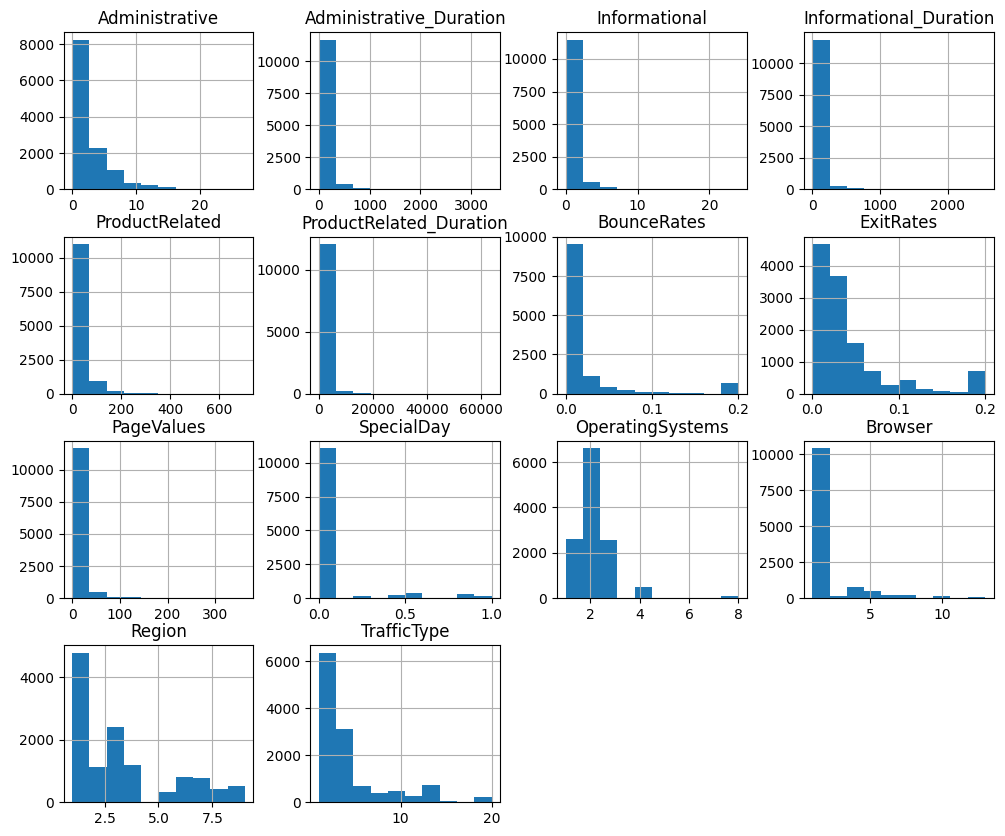

In [32]:
df.hist(figsize=(12, 10))
plt.show()

Columns: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Data Types:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool

C:\Users\human-14\AppData\Local\Temp\ipykernel_8692\1463630308.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.update(numeric_df)  # 숫자형 열 업데이트
C:\Users\human-14\AppData\Local\Temp\ipykernel_8692\1463630308.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.update(numeric_df)  # 숫자형 열 업데이트


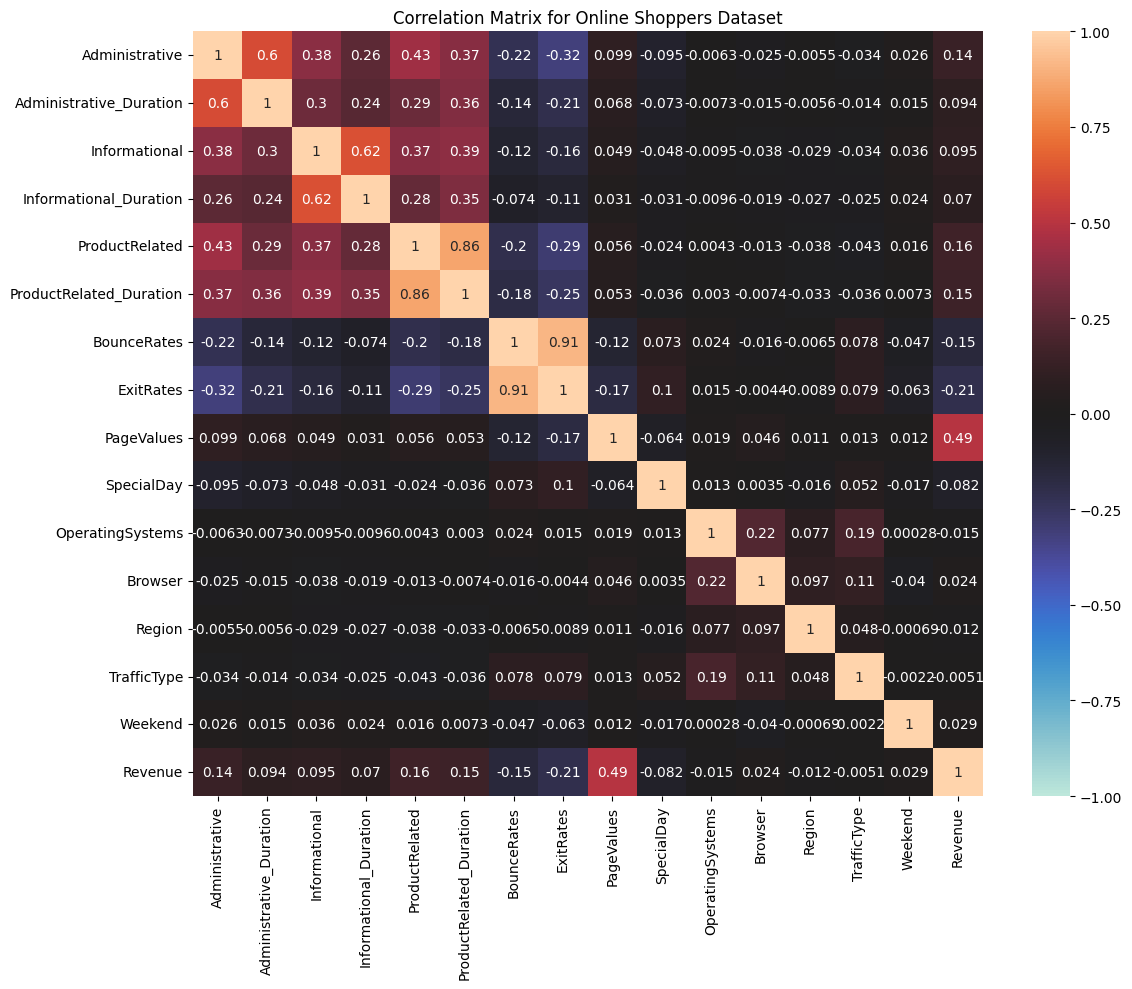

In [45]:
# 변수 간 상관 관계
print("Columns:", df.columns)
print("Data Types:\n", df.dtypes)

# 비수치형 열 식별
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# 숫자형 및 불리언 데이터 포함 (불리언을 0, 1로 변환)
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool']).copy()
numeric_df['Weekend'] = numeric_df['Weekend'].astype(int)  # bool to int
numeric_df['Revenue'] = numeric_df['Revenue'].astype(int)  # bool to int

# 데이터 손상 여부 확인 (예: VisitorType에 이상한 값)
print("Sample data check:")
print(df['VisitorType'].head(10))  # VisitorType 열 확인

# 상관계수 계산
corr = numeric_df.corr()
print("Correlation Matrix:\n", corr)

# 결측값 처리 (숫자형 열에 대해 mean 사용)
numeric_means = numeric_df.mean(numeric_only=True)  # numeric_only=True 추가
numeric_df.fillna(numeric_means, inplace=True)

# 전체 데이터프레임에 결측값 처리 (비수치형 열은 따로 처리)
df.update(numeric_df)  # 숫자형 열 업데이트
df[non_numeric_columns] = df[non_numeric_columns].fillna('Unknown')  # 비수치형 열은 'Unknown'으로 대체

# 결과 확인
print("Filled Data Types:\n", df.dtypes)
print("First few rows after fillna:\n", df.head())

# 상관계수 시각화
plt.figure(figsize=(12, 10))  # Figure 크기 설정 (heatmap 전에)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix for Online Shoppers Dataset")
plt.tight_layout()
plt.show()

In [42]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

TypeError: Could not convert ['FebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayOctJuneOctJuneJuneJulOctAugNovNovOctJulNovSepOctJuneJuneAugSepOctOctOctOctJulNovOctAugAugJulOctJuneJulJulSepOctJulOctOctOctNovJulSepNovSepJuneOctSepJuneJulOctJulOctNovOctNovNovAugJulJulSepNovOctSepJulSepJuneSepJulOctOctSepJulJulAugJulOctAugAugNovSepSepSepNovSepAugOctOctNovAugJuneJuneOctJulNovOctOctJuneJulOctNovJuneNovNovSepJuneOctOctJulSepOctJuneAugSepAugOctAugSepAugOctJuneOctNovSepAugNovSepSepSepAugAugJulJulJuneSepSepAugJuneSepOctJuneAugAugJuneJuneOctAugJuneOctJuneAugSepJuneOctNovJulOctAugAugSepJulSepNovJulJulOctJulSepAugJulJulNovOctJulJulAugJuneOctAugJuneOctOctSepAugJulJulNovJuneSepJulNovJulOctAugNovJuneJulAugOctOctSepJuneNovJulJulAugOctJulAugNovJuneSepJuneAugNovJulOctJulJuneNovOctSepJuneJulAugJuneSepOctJulJuneAugOctSepJulJulSepOctJulJulSepJuneOctJulNovJulJuneOctJulSepJuneJuneSepJulNovOctAugOctOctJulAugJulAugNovOctOctOctJuneJuneOctOctNovJuneSepNovOctOctOctAugSepOctJulAugJuneJuneSepNovJuneOctNovOctAugJulNovJulSepJulOctOctSepJulOctNovAugOctSepOctSepSepAugJuneOctJulOctOctNovSepOctJulJulOctSepAugJulSepNovOctJulJulOctSepJulJuneNovJulJulSepNovJulOctOctSepAugJulJulJuneAugJuneJulAugJulJuneJulAugSepJulSepJuneJulNovSepJulAugSepOctJulSepJulOctAugNovJulAugJulNovOctNovOctNovOctOctOctSepSepOctJulSepSepSepNovJulSepOctJuneJuneSepJulAugOctAugNovSepJulJuneSepJulNovJuneOctNovJulJuneOctJulJuneOctJuneJuneAugSepAugSepNovJulNovAugJulJuneAugNovAugAugSepJulNovOctNovJuneAugJuneSepAugNovJuneNovSepSepSepSepSepNovJuneOctJulAugOctSepSepJulJulAugJuneSepSepOctJuneSepJuneNovJulAugSepSepOctSepJulSepAugOctJuneSepAugSepJulSepNovNovOctNovOctOctAugOctAugAugAugNovSepNovAugJuneAugAugNovJulAugOctOctOctJulOctOctOctJulJuneNovJulOctAugAugOctJulNovOctJuneNovAugNovOctJuneAugNovOctJuneAugOctOctAugJulJuneNovSepJuneAugJuneAugAugAugOctOctNovNovSepAugSepAugSepNovNovNovSepOctAugSepOctAugNovJulOctOctAugJulSepJulOctJulSepJulJuneJuneOctAugJuneAugJuneNovOctJulOctNovJuneJulAugJuneNovOctJulNovAugSepSepJulJuneJuneSepOctNovSepAugJuneOctJulNovJulNovOctAugJuneSepAugOctAugJuneNovSepOctSepJulJulJulOctJulSepJulJulOctOctJulOctAugJulSepSepAugJuneSepAugNovAugSepSepJuneNovAugOctSepOctAugNovAugAugJulJuneJulAugAugSepAugJuneNovOctNovNovAugJulAugNovJuneAugJulJulJuneJuneAugNovSepOctSepJulJulSepNovAugNovNovJulNovNovOctJulSepJulSepOctAugJulJulOctAugNovNovJuneJulJuneAugOctSepJulSepOctAugAugJuneJuneOctOctJulAugOctOctJulOctSepJulAugJulNovSepSepOctSepAugOctNovJuneJulSepSepNovAugOctOctAugSepSepOctAugOctJuneSepAugSepJuneJulAugNovJulSepOctOctJulNovAugAugJulJuneAugNovSepJuneAugOctJulJulOctJulAugJulOctJulNovAugSepSepNovAugSepOctSepOctAugJulOctOctAugOctOctNovOctJulOctSepJulAugAugOctNovNovAugOctOctNovSepNovOctAugNovSepAugOctNovOctNovAugJulJulNovNovOctOctJulJulOctNovJulNovOctJulOctOctJulAugNovOctOctJulAugOctNovSepJulAugSepSepSepSepNovOctJulJuneJuneAugOctJulNovOctAugJuneJulNovAugSepSepAugAugSepSepJuneSepAugJulAugAugAugSepNovJulAugJulJuneOctOctSepNovJuneSepOctOctSepNovAugJulOctJulJulSepJulNovOctJuneSepSepJuneOctSepJulAugAugJulJuneAugOctJuneSepNovNovJulJuneSepAugOctOctSepJuneSepOctNovOctJuneJuneAugSepOctSepJuneJulAugAugOctJulSepSepJulSepJulOctJulJuneSepJulSepNovOctSepJulSepJuneJulSepJuneNovNovSepAugOctOctSepOctNovJuneJulOctJulSepOctSepOctJulJulOctSepOctSepSepOctAugJulAugSepOctOctSepOctAugOctOctSepJulOctOctSepSepSepJulJulSepNovNovAugNovAugAugJulNovSepOctJulJuneSepOctJulSepSepJuneSepJuneJulOctNovAugSepNovOctNovJuneNovJulJulSepSepNovJulJulAugAugOctSepSepOctNovAugSepSepNovSepSepAugOctJulOctJulAugSepNovJuneJuneOctAugOctAugSepJulAugAugSepAugJuneAugSepAugOctJuneNovOctSepOctOctOctAugSepNovSepJuneSepNovNovJuneJulSepSepNovAugSepSepJulSepJulJulOctOctNovJulOctJulJulJulSepOctJuneOctOctOctOctOctSepSepNovJuneAugJulJulOctJuneNovJuneSepJulSepAugSepNovAugJulJulSepSepAugJulOctOctOctNovSepSepNovOctSepJulSepSepAugNovAugOctOctSepNovOctNovOctJulSepSepSepAugNovAugSepNovJulJuneSepJulJulJuneSepOctAugNovAugJulNovJulJulSepOctJuneSepSepJuneNovSepNovOctJulNovOctAugSepAugJulAugOctOctNovJulOctJulNovJulSepSepJulAugAugNovOctOctAugJulAugOctJulAugAugAugOctOctAugAugJuneAugJuneJuneNovAugNovAugAugNovNovSepJuneOctJulSepAugNovJuneNovSepNovJulNovNovJulSepAugJulNovJuneJuneAugSepOctOctOctOctNovSepNovAugAugAugNovJulNovOctJuneJuneOctOctSepAugOctJulOctNovSepOctOctJuneSepJuneJuneNovSepJulOctNovAugJuneNovOctOctSepJulAugSepNovSepOctOctAugNovJulOctAugOctOctAugAugOctAugJuneJulJuneSepOctNovAugOctNovOctAugJulJuneJuneSepNovAugJulAugJulJulAugNovJulAugJulOctOctJulSepJuneJuneAugSepNovNovSepOctJuneOctJuneJuneSepJulJuneOctSepNovJulJuneJuneJulJuneAugNovJulSepAugAugNovAugNovAugOctSepAugJulJulOctSepNovOctJuneSepNovOctOctNovAugAugJulSepJulSepJulAugOctNovAugOctAugAugNovAugAugOctNovOctJulOctAugJuneOctSepNovJulOctOctSepJuneJulOctNovAugOctNovAugAugJulSepOctAugJuneOctJulSepNovJulOctJulAugSepOctOctJuneOctJulSepJulOctJuneNovNovOctJulAugSepNovNovAugAugJuneOctOctSepSepSepOctSepJulNovAugOctNovJulAugJulSepSepJulJulJuneAugJuneNovAugSepJulAugJulAugJuneOctJuneOctJuneJulAugSepOctJulOctJuneNovOctJulOctSepOctAugSepAugJulAugOctJuneOctJulOctAugOctOctSepOctNovOctAugJulJulOctOctOctOctOctAugOctNovJuneSepAugJulOctAugOctNovJulJulJulSepJulSepSepOctNovSepSepAugSepOctOctNovSepJulOctNovOctSepJulJuneJulSepSepNovOctAugAugJuneOctSepJuneAugJulSepAugNovNovOctOctNovJulOctOctAugAugSepNovOctAugAugOctOctOctSepAugNovAugNovAugNovNovSepSepAugSepAugNovOctOctJulJulNovSepAugJulJuneAugAugOctAugSepOctOctNovSepOctJulNovAugSepNovJulOctOctJulSepNovOctSepJulOctJulAugNovOctJuneNovJuneOctAugOctJuneNovSepNovJulNovAugAugJulOctNovNovAugSepAugAugOctNovNovSepJuneJulNovAugNovOctJuneAugJuneOctAugJuneJulJuneJulSepSepAugJuneSepSepOctAugOctJuneJuneOctSepJulSepNovNovJulJulJulOctJuneAugSepJuneJulSepOctOctJuneJuneOctSepNovSepNovAugJulOctJuneSepJulOctOctSepNovOctAugOctNovNovAugNovOctAugJulOctOctSepSepAugJulSepJuneAugJuneSepAugJulOctJulNovOctAugOctNovOctSepOctJulOctSepAugJulJulJuneOctSepJulOctSepAugJuneAugSepJuneJulNovJuneJulOctAugOctJulJulNovOctOctJuneNovNovNovSepSepSepAugNovNovAugSepJuneNovNovOctAugOctJuneJulJulJuneJulOctJulJuneSepNovJuneSepSepAugJulSepSepJulJulOctJulNovOctOctAugOctAugOctAugSepJulAugJuneAugNovNovNovSepSepNovJulSepAugNovOctNovJuneSepNovNovOctOctNovAugOctSepAugAugJulAugNovJuneOctAugSepSepOctJulAugJuneAugOctSepOctOctOctAugAugJulOctAugSepJulJulJulJulJuneAugJulOctOctJulNovSepOctNovJuneNovJuneJuneSepJulJulAugAugNovNovAugJulAugSepJulSepJulOctSepJulAugSepOctSepJuneOctOctNovNovJuneOctAugAugOctSepJuneOctOctAugOctOctSepOctNovOctJulNovJulJuneJulJulAugAugJuneNovNovAugSepNovJulAugNovAugNovOctNovAugNovJuneOctAugJuneSepOctJulSepAugOctJuneNovSepJulAugJuneJuneNovAugOctSepAugNovSepJuneSepAugOctSepJulJulAugJuneNovOctJulSepOctAugOctOctAugJulSepJulOctJulJuneSepNovOctSepAugJuneOctNovNovJuneSepSepAugOctOctJulNovJuneOctJuneSepJulJulJuneJulNovJuneNovOctNovJuneSepOctAugJuneAugJuneJulJulNovJulAugJuneJulJuneSepJuneAugNovSepOctOctNovJuneOctOctJulAugJulOctOctNovOctJulAugOctSepOctSepNovNovJuneAugNovAugSepOctOctNovJulSepNovAugOctSepOctAugOctAugAugJulSepJuneJulNovAugOctOctSepJulSepSepJuneOctJuneJulJulAugAugNovAugJuneAugSepJuneSepNovSepJulOctJulOctNovJulAugSepAugNovJulAugSepSepSepJulAugJulSepSepJulJuneOctSepJuneJuneAugOctJulJulJulJuneOctJulNovJulAugJuneJulOctSepJulNovSepAugJulOctJuneOctNovSepAugOctSepAugJuneNovSepJuneOctSepJulJulJuneAugAugJuneJulOctJulJulNovOctJulSepNovJulAugNovNovOctSepOctOctSepJulJuneAugOctNovAugSepAugNovJulOctJulNovAugSepAugOctAugOctNovJulOctNovOctOctJulJuneJuneOctNovNovOctNovAugJuneOctAugJuneSepOctAugNovOctSepSepSepOctOctJulNovAugSepOctNovSepSepJulSepOctAugNovSepOctAugJuneAugSepNovNovAugOctAugJuneJuneOctSepJuneOctSepOctSepNovAugSepAugNovAugNovAugNovSepJuneAugJuneJulJuneNovAugOctSepNovOctJulJulSepOctSepNovNovOctAugJuneAugJuneNovOctSepSepJulJulJulJulOctOctAugOctAugOctSepJuneOctJulSepJulSepAugNovNovNovOctNovNovOctAugOctJuneNovJulOctAugOctJulJuneOctNovOctAugOctAugJuneJulAugJulJulOctSepAugJuneJulOctSepAugSepOctAugAugNovJuneOctOctOctNovAugSepNovOctOctJulJulAugJulJulOctAugJulOctJulSepSepJulJuneNovNovAugOctNovSepOctOctJuneSepNovNovAugNovJulNovSepNovAugOctAugAugOctNovSepJuneSepJulSepAugJuneOctSepOctSepNovOctJuneNovOctSepSepSepAugOctJulOctDecDecDecDecNovNovNovDecNovNovDecNovDecNovNovNovDecNovNovDecNovDecNovDecDecDecNovNovNovDecNovDecNovDecNovDecNovDecNovNovNovDecNovDecNovDecNovNovNovDecNovDecNovNovDecNovNovNovDecDecDecNovNovNovNovNovNovDecNovNovNovDecNovDecDecNovDecDecNovNovDecNovDecDecNovNovNovDecNovDecNovDecDecNovNovDecDecDecDecNovNovNovNovDecDecNovNovNovDecNovNovNovNovNovNovDecDecDecNovNovDecDecNovNovNovDecNovDecDecNovDecNovNovDecNovNovNovNovNovDecDecNovDecNovDecNovNovNovNovNovDecNovNovDecDecNovNovNovDecNovDecNovNovNovDecNovDecNovNovNovDecDecDecNovNovNovDecNovNovDecNovNovNovDecNovNovDecDecDecDecNovNovDecNovDecNovNovNovNovDecDecNovDecNovNovDecDecNovNovDecDecNovDecDecNovNovNovNovNovNovDecNovDecDecNovNovNovDecDecDecDecNovDecDecDecDecDecNovNovNovDecDecNovDecNovNovDecNovNovDecNovNovNovDecDecDecNovDecNovDecNovNovNovNovDecDecNovNovNovDecNovNovNovNovDecDecNovDecNovNovNovNovNovDecNovDecNovNovNovDecNovDecNovNovNovNovNovNovDecNovDecNovNovNovNovNovNovDecDecNovDecNovDecNovNovDecDecDecDecNovDecNovDecDecDecDecNovNovNovNovDecDecDecNovNovDecNovDecNovNovNovNovNovNovNovNovDecDecNovNovNovDecDecNovNovNovNovNovDecNovNovNovNovDecNovNovNovNovDecNovNovNovDecNovNovNovNovDecNovDecNovNovNovDecDecDecDecNovDecDecNovDecDecNovNovNovNovDecNovNovDecNovDecDecNovDecDecDecNovNovNovNovDecNovNovDecDecNovNovDecNovNovNovNovDecDecDecDecNovDecNovNovDecNovDecNovNovNovNovDecNovNovNovNovNovNovNovNovNovNovNovNovDecDecDecDecNovDecDecNovNovNovDecNovDecNovDecDecDecNovNovDecNovNovNovNovNovDecDecNovNovNovNovNovNovDecNovDecDecDecNovDecNovDecNovNovDecNovDecNovDecDecDecNovNovNovDecDecDecNovNovDecNovDecDecDecDecNovDecNovNovDecNovDecDecNovNovNovNovDecDecDecNovNovDecDecNovDecNovNovNovNovNovNovNovNovNovNovNovDecNovDecDecNovNovDecNovNovNovNovDecNovNovNovNovDecNovDecNovNovNovNovDecNovDecNovNovDecNovDecNovNovNovNovNovDecNovNovDecDecNovNovNovDecNovNovNovDecDecDecNovNovDecNovNovDecNovDecDecNovNovNovNovDecNovDecNovDecNovDecNovDecNovNovDecDecNovNovDecDecNovDecDecDecDecDecNovDecDecDecNovNovNovDecNovNovNovDecNovDecNovDecNovDecNovNovDecDecDecDecDecNovDecNovDecDecNovNovDecNovDecNovNovNovDecNovDecNovNovDecDecNovNovDecDecDecNovDecNovNovNovDecDecNovNovNovNovNovDecNovNovDecDecDecDecNovNovNovNovNovNovNovNovNovDecNovDecDecNovNovDecNovNovNovNovNovDecNovDecNovDecDecNovNovNovDecNovNovNovDecDecNovNovNovNovNovDecNovNovNovNovNovDecDecNovDecNovDecNovDecNovNovNovNovDecDecNovDecNovNovDecNovDecNovDecNovDecDecNovNovNovNovNovDecNovNovNovNovNovNovNovNovNovNovNovDecDecNovDecDecNovDecNovDecNovDecDecDecNovDecNovNovNovDecDecDecNovNovDecDecNovDecNovDecDecNovDecDecNovNovNovNovNovDecNovNovNovDecDecNovDecNovDecNovDecDecNovNovNovNovNovNovDecNovNovNovNovDecNovDecDecDecNovNovNovNovNovNovDecDecNovNovNovNovDecNovDecNovNovNovNovNovDecNovDecNovDecNovNovDecNovNovNovNovDecNovNovNovDecNovDecDecDecNovDecNovNovNovDecNovDecDecDecNovDecDecDecNovNovNovDecNovDecDecNovNovNovNovNovNovDecNovNovNovNovNovNovDecDecDecNovDecDecNovNovNovDecNovNovNovDecDecDecNovDecDecNovNovNovDecNovDecDecNovNovNovNovDecDecDecNovNovNovNovDecDecNovDecDecNovNovNovNovNovNovNovNovNovDecNovNovNovDecNovNovDecNovNovNovDecNovNovNovDecDecDecNovNovDecNovDecDecNovNovNovNovDecNovNovNovNovNovNovNovDecNovDecNovNovNovDecNovNovDecNovDecNovNovDecDecDecNovNovDecNovNovNovDecDecNovNovDecNovNovDecNovDecNovNovDecDecNovNovDecNovNovNovNovNovNovNovDecDecNovDecNovNovNovDecDecNovNovDecNovNovDecNovNovNovDecNovNovDecDecNovNovNovDecNovNovDecNovNovDecDecNovNovDecNovDecNovDecDecDecDecNovNovDecDecDecNovNovNovDecNovDecNovNovDecDecNovNovNovNovDecDecNovDecNovNovNovDecNovNovDecDecDecDecNovNovNovNovNovDecNovDecNovDecDecDecNovNovNovDecDecNovDecDecDecDecNovNovDecDecDecNovDecNovNovNovDecNovNovNovNovDecNovNovNovNovNovNovDecNovNovNovDecDecNovNovNovNovDecDecNovNovNovNovDecNovDecDecDecNovNovDecDecDecDecDecNovDecNovNovDecDecNovDecDecNovNovNovNovNovDecDecDecNovNovNovNovDecNovDecDecNovDecNovDecNovNovDecDecNovNovDecDecNovDecNovNovDecNovNovDecNovNovNovDecDecNovNovNovNovNovNovDecNovNovDecDecNovDecDecNovDecNovDecNovDecDecNovNovNovNovNovDecNovNovDecDecDecNovDecNovNovDecNovDecNovDecNovNovDecNovNovNovNovNovDecNovNovDecNovDecDecNovNovNovDecNovNovDecNovNovNovNovNovNovNovDecNovNovNovDecNovDecDecDecNovNovNovNovNovNovDecNovNovNovNovDecNovDecNovNovNovDecNovNovDecNovNovDecNovNovNovNovNovDecNovNovDecNovDecDecDecNovDecNovNovNovNovNovDecNovNovNovNovNovNovNovNovNovNovNovDecNovNovNovNovNovDecNovNovDecNovNovDecNovNovNovNovDecDecDecNovDecDecDecNovNovNovDecNovDecDecDecDecNovDecNovNovNovNovNovDecNovNovDecDecNovNovDecDecDecDecDecDecDecNovNovNovDecDecNovNovNovDecDecNovDecDecDecDecNovNovNovNovNovNovDecNovDecDecNovDecNovNovNovNovNovDecDecDecDecNovNovNovDecNovDecDecNovNovNovNovNovDecNovNovDecNovDecDecNovDecNovNovNovDecDecDecDecDecNovNovDecNovNovDecDecNovDecNovNovNovNovDecNovNovNovNovDecDecNovNovNovNovNovDecNovNovNovDecNovNovDecDecDecNovNovDecNovNovNovNovNovNovNovNovDecDecDecDecNovNovNovNovNovDecDecDecNovNovDecNovDecNovDecDecNovNovDecNovNovDecDecNovNovNovNovDecNovDecDecDecDecDecNovNovNovNovNovDecNovNovNovNovDecDecNovNovNovNovNovNovNovDecNovDecNovDecDecNovNovNovNovNovDecNovNovNovNovDecDecNovNovNovNovNovNovDecDecNovNovDecNovNovNovNovNovNovNovNovDecNovDecDecDecDecDecDecNovDecNovNovDecNovDecNovDecNovNovDecNovNovDecNovNovNovNovNovDecNovNovNovDecDecDecDecNovNovDecDecNovDecNovDecDecDecNovNovNovNovNovDecDecDecDecNovNovDecDecNovDecDecNovNovNovDecDecNovNovNovDecNovNovDecNovNovNovNovNovNovNovNovNovDecNovNovDecDecNovNovNovNovDecDecDecDecNovNovDecNovNovNovNovNovNovNovDecDecNovDecDecNovNovNovNovNovDecNovNovNovNovNovDecDecNovDecNovDecNovDecDecDecNovNovNovDecDecDecDecNovNovNovNovNovDecDecNovNovNovDecDecDecDecDecNovDecNovNovNovDecNovDecDecNovNovNovDecDecDecNovDecDecDecDecNovNovNovDecDecNovNovNovNovDecNovNovDecDecNovDecNovNovDecNovDecDecDecNovNovNovDecNovDecDecDecNovDecDecDecNovDecNovDecNovNovNovNovDecDecDecNovNovDecNovDecDecDecNovDecDecNovNovDecNovNovNovDecDecNovDecNovDecDecDecDecDecDecNovDecDecNovNovDecNovDecNovNovDecNovNovNovDecNovNovNovNovNovNovNovNovDecNovNovNovDecDecNovNovNovNovNovNovNovNovNovNovDecNovDecDecNovDecNovNovDecNovDecNovNovNovNovDecNovNovNovDecNovNovNovNovNovNovNovDecNovNovNovNovDecNovNovNovNovNovNovNovNovNovDecDecNovDecDecNovNovNovNovDecNovNovNovDecDecNovDecNovDecDecNovNovNovNovNovNovDecDecNovDecDecDecNovDecNovNovNovNovNovNovDecDecDecNovDecNovNovNovDecNovDecNovDecDecNovNovNovNovDecNovNovNovNovDecNovDecNovNovNovDecDecDecNovDecDecNovNovDecNovNovNovDecDecNovNovNovDecNovDecDecDecDecNovNovDecDecNovDecNovNovDecNovNovDecDecDecDecNovNovNovDecNovNovNovDecNovDecDecDecNovDecNovNovDecDecDecDecNovNovNovNovDecNovNovNovDecNovNovDecNovDecNovNovDecDecDecNovDecNovDecNovDecDecDecDecDecDecNovDecNovNovNovNovNovDecNovNovNovNovNovDecDecDecDecDecNovNovDecDecNovNovNovDecNovDecNovDecNovDecNovNovNovDecNovDecNovNovNovNovDecDecNovNovNovNovNovDecNovNovNovNovNovNovNovDecDecNovDecNovDecNovNovNovNovNovNovNovDecNovDecNovNovDecNovDecNovNovNovDecNovNovDecNovNovNovDecNovNovNovNovDecDecDecNovNovNovNovNovNovDecNovNovNovNovNovNovNovDecNovNovNovDecNovNovDecDecDecNovNovNovNovDecNovDecDecNovDecNovNovNovNovNovNovDecDecNovDecNovNovNovNovDecNovNovNovDecNovNovDecDecNovDecDecNovNovDecDecDecNovDecNovNovNovNovDecDecDecNovDecNovNovDecNovNovNovDecNovNovDecNovNovDecNovNovNovDecNovNovDecDecDecDecDecNovNovNovDecDecNovNovNovDecNovNovNovNovNovDecNovNovNovNovDecNovNovNovNovDecNovDecDecNovDecNovNovDecNovDecNovDecNovDecDecNovDecNovDecNovNovNovNovDecNovDecDecNovNovNovNovNovDecDecDecNovDecNovDecNovNovNovNovNovDecNovNovNovNovNovDecDecDecDecNovNovNovNovNovNovNovDecNovNovNovDecNovNovNovNovDecNovNovDecDecNovNovDecNovNovNovDecNovNovDecDecNovDecNovNovNovDecDecDecNovNovDecNovDecNovNovNovNovDecDecDecDecDecNovNovNovNovDecDecNovDecDecDecNovDecNovNovNovNovNovNovNovNovNovNovDecNovDecDecDecNovNovDecNovNovDecNovDecNovNovDecNovNovNovNovDecNovDecDecNovDecNovNovNovDecNovNovDecDecNovDecDecDecNovDecNovNovNovNovDecDecNovNovDecNovNovNovNovDecNovDecDecNovNovNovDecNovNovDecNovNovDecDecNovDecNovDecNovNovDecNovDecNovNovDecNovDecNovNovNovNovNovDecDecDecNovNovDecDecNovNovNovNovNovDecDecNovNovNovNovNovNovDecNovNovNovNovNovNovNovDecNovNovNovDecDecNovDecNovNovNovNovNovDecNovDecNovDecNovNovNovDecNovDecNovNovNovNovNovDecNovDecNovNovNovDecNovNovNovNovNovNovDecNovDecDecDecNovNovNovDecNovDecDecDecNovNovNovNovDecDecDecNovDecNovNovNovDecNovNovDecNovNovNovNovDecNovDecNovNovDecDecNovNovDecNovNovNovDecDecDecDecDecDecDecNovNovNovDecDecDecNovNovDecDecDecNovDecDecDecDecDecNovDecDecNovDecDecNovNovDecNovNovNovNovDecDecDecDecDecDecDecDecDecDecNovDecNovDecDecDecNovNovDecDecDecNovDecNovNovNovNovDecDecDecNovNovNovNovNovNovNovDecNovNovNovNovDecDecDecNovNovDecNovNovDecDecNovDecDecDecNovNovNovNovDecDecDecNovDecNovDecNovNovNovNovNovDecNovNovNovNovNovDecDecDecDecNovNovNovDecNovNovNovNovDecDecNovNovNovNovNovDecNovNovNovDecDecNovDecNovNovNovNovDecNovNovNovNovNovDecNovDecNovNovNovNovNovNovDecNovNovDecNovNovNovDecNovNovDecNovDecDecDecNovDecNovNovNovDecNovDecNovDecNovDecNovDecNovNovNovNovNovDecNovDecDecNovNovNovNovDecNovDecNovNovDecNovNovNovNovDecNovNovNovDecDecDecNovNovNovNovNovDecNovNovDecDecNovNovNovNovNovNovNovDecDecNovNovNovNovNovNovNovDecNovNovNovNovNovNovDecDecNovNovDecNovNovNovDecDecNovNovNovNovNovDecDecDecNovDecDecNovNovNovDecDecNovDecDecNovNovNovNovDecNovNovDecDecNovDecNovDecNovDecNovNovDecDecDecDecNovDecNovDecNovDecDecNovNovNovNovNovDecDecNovNovDecDecNovNovDecDecDecNovNovDecDecDecNovDecNovNovDecDecDecNovNovNovDecNovDecNovNovNovNovNovDecNovDecDecDecNovNovDecNovDecDecNovNovNovDecNovDecNovNovNovNovDecNovDecDecNovDecDecDecNovNovNovDecDecDecDecNovNovNovNovNovDecDecNovDecNovNovNovNovNovNovDecNovNovDecDecDecNovNovDecNovNovNovDecNovNovNovNovDecDecNovNovNovNovDecDecDecDecNovNovDecDecDecNovNovNovNovNovDecDecNovDecDecNovNovNovNovDecNovNovDecNovNovDecDecNovNovNovDecNovDecNovDecNovDecNovDecNovNovDecNovDecNovNovNovNovDecDecNovNovNovNovDecNovNovNovDecNovNovNovNovDecNovNovDecNovNovNovNovDecNovNovNovDecDecNovDecDecNovNovNovNovDecNovDecNovNovNovNovNovDecDecNovNovNovDecDecDecDecDecNovNovNovDecNovDecDecNovNovNovNovNovNovNovNovNovDecDecNovDecDecNovDecDecNovNovNovNovNovDecNovNovNovNovDecNovNovDecNovDecDecNovDecNovNovNovNovDecNovDecDecNovDecDecNovDecNovDecDecNovNovNovNovNovDecNovNovNovDecDecDecDecDecNovNovNovDecDecDecDecNovDecNovNovNovNovNovNovDecNovNovDecDecDecNovDecNovNovNovNovDecDecDecNovNovDecNovNovDecDecDecNovDecDecDecNovNovNovNovDecNovNovDecNovNovNovNovNovNovNovNovDecDecDecDecNovNovNovDecDecNovNovDecNovDecDecNovNovNovDecDecNovNovDecDecDecNovDecNovDecNovNovNovNovDecNovDecDecNovNovDecDecDecNovDecDecDecDecNovNovNovNovDecNovNovDecDecNovNovDecNovNovNovNovNovDecDecDecNovDecDecNovNovDecDecDecNovDecDecNovNovNovNovNovNovDecDecDecDecNovNovDecNovNovNovDecNovNovDecNovDecNovNovNovDecNovNovNovNovDecNovNovNovNovDecNovNovNovDecNovNovDecDecNovDecDecDecDecDecNovNovNovDecNovDecNovNovNovNovNovNovNovNovNovNovNovNovNovNovNovDecNovDecDecNovNovDecNovDecNovDecNovNovDecDecDecNovNovNovNovNovNovNovNovNovDecNovNovNovDecDecNovNovDecNovDecNovDecNovDecNovNovDecNovNovDecNovDecNovDecNovNovNovDecNovNovNovNovNovNovDecNovDecNovNovDecDecNovNovNovDecDecNovDecNovNovNovNovNovNovNovNovDecDecNovNovNovDecNovNovDecNovNovNovNovNovNovNovNovDecNovNovNovNovNovNovNovNovNovDecDecNovNovNovDecDecDecDecNovNovNovDecNovDecDecNovNovNovDecNovNovDecDecNovNovDecDecNovNovDecDecDecNovDecDecNovDecNovNovDecNovNovNovNovDecDecNovDecNovDecNovDecNovDecDecNovDecDecDecNovNovNovDecDecDecNovDecDecNovDecDecNovNovNovNovDecDecNovDecDecNovNovDecNovNovNovNovNovNovNovNovDecDecNovDecNovNovDecNovNovNovDecDecDecDecDecNovNovNovDecNovDecDecNovNovNovDecNovNovNovNovDecNovNovNovDecDecDecDecNovNovNovNovDecNovDecNovNovNovDecDecDecNovNovDecNovNovNovNovNovNovDecNovNovDecDecNovNovNovNovNovNovDecDecDecNovNovNovDecNovNovNovDecDecNovNovNovNovDecDecNovNovDecNovNovNovNovNovNovDecNovDecNovNovNovDecDecDecDecNovNovDecDecNovNovDecNovNovDecDecNovDecNovDecDecNovDecNovNovDecNovDecNovDecNovNovNovDecNovDecNovNovNovNovNovNovDecNovNovDecDecNovDecDecDecNovDecNovNovNovNovDecNovNovNovNovDecNovDecNovDecNovNovNovDecDecNovDecDecDecNovNovDecDecNovDecNovNovNovNovNovDecNovDecNovNovNovDecDecNovDecNovNovDecDecDecNovDecNovDecNovDecNovDecNovNovDecNovNovNovDecDecNovNovNovNovDecNovNovDecDecDecNovNovNovDecNovDecDecDecDecNovNovDecDecNovDecDecNovDecNovNovNovNovNovDecNovNovNovNovNovDecNovNovNovNovNovNovDecNovNovNovNovNovNovNovNovDecDecDecNovNovNovNovDecNovDecDecDecNovNovNovNovDecNovDecNovNovNovDecNovNovDecDecNovNovNovNovDecNovNovDecNovDecDecNovDecDecDecDecDecDecNovNovNovNovNovNovDecNovNovNovDecNovNovDecNovNovDecDecNovDecNovNovNovNovNovDecDecDecDecDecDecNovNovNovDecNovNovDecDecNovNovDecDecNovNovNovNovDecNovNovDecDecNovDecDecNovNovDecDecDecNovDecDecDecNovNovNovDecDecDecNovDecNovNovNovDecNovNovDecNovNovNovDecNovNovDecNovNovNovNovDecNovDecDecNovDecDecNovDecDecNovDecDecDecNovNovNovNovDecDecDecNovNovDecNovDecNovNovNovNovNovNovNovNovDecNovNovNovDecNovDecDecNovDecNovNovNovDecDecDecDecDecDecDecNovNovDecNovNovNovNovNovDecDecNovNovNovNovDecDecNovDecNovNovDecDecDecNovNovDecDecDecNovDecNovNovNovNovNovNovNovNovNovDecDecDecNovNovDecNovDecNovNovDecDecDecDecNovNovDecNovDecNovDecNovDecNovNovNovDecDecDecDecDecNovNovDecNovNovDecNovNovNovNovNovNovDecDecNovNovDecDecDecDecNovNovDecNovNovNovNovNovNovDecNovNovNovDecDecNovNovNovDecDecNovDecNovNovNovNovDecDecNovNovNovNovNovDecDecNovNovDecNovNovDecNovDecDecNovDecDecNovNovNovNovNovNovDecDecNovDecDecNovDecNovNovNovDecDecNovDecDecDecDecNovNovDecNovNovDecNovNovNovNov'
 'Returning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorNew_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorOtherReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherOtherReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherOtherReturning_VisitorOtherNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorOtherNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorOtherNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorOtherReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorOtherReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorReturning_VisitorNew_Visitor'] to numeric